# 🐵 End-to-End Multi-Class Face Expression Classification

This notebook builds and end-to-end Face Expression Detection using Keras and CNN's.

## 1. Problem

Identifying the face expression of a human, given an image of him/her.

## 2. Data
  
Data is taken from Kaggle's Facial Expression Recognition Challenge:
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

Currently the data from above official Kaggle link is not available. So we can take the same data from : https://www.kaggle.com/shawon10/facial-expression-detection-cnn?select=fer2013.csv

## 3. Evaluation

Evaluation is done based on accuracy and loss between predicted expression and actual expression.

## 4. Features

Some information about the data:
* We're dealing with images(unstructured data), so better we use deep learning / transfer learning.
* Data has 3 columns namely emotions, picture, and usage(Training/Testing).
* Data has 35887 rows(images).
* There are 28709 training images (with column value as Training).
* There are 3589 testing images (with column value as PublicTest).
* PrivateTest records are ignored as of now.
* Data has 7 classes (emotions).
  * 0=Angry
  * 1=Disgust
  * 2=Fear
  * 3=Happy
  * 4=Sad
  * 5=Surprise
  * 6=Neutral


In [0]:
# Unzip the uploaded data into google drive
# !unzip "drive/My Drive/Expression Detection/fer2013.csv.zip" -d "drive/My Drive/Expression Detection/"

## Getting our Workspace ready

In [0]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

base_path = "drive/My Drive/Expression Detection/"
%matplotlib inline
# other imports will be done in the appropriate cells whenever necessary

Using TensorFlow backend.


### Check GPU availability

In [0]:
# Check for GPU availability
print("GPU ", "available :) !!" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU  available :) !!


## Getting our data ready

### Importing data into numpy array

In [0]:
raw_df = pd.read_csv("drive/My Drive/Expression Detection/fer2013.csv")
raw_df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


### Exploring data

In [0]:
# Checking for number of columns
raw_df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [0]:
# Checking for total number of records and their data_types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
# Checking for total number of unique classes
raw_df["emotion"].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [0]:
# Checking for total number of training and testing images
# Total training images:
raw_df[raw_df['Usage'] == "Training"]

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [0]:
# Total testing images:
raw_df[raw_df["Usage"] == "PrivateTest"]

,emotion,pixels,Usage
32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [0]:
# Checking total unique values in Usage column
raw_df["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

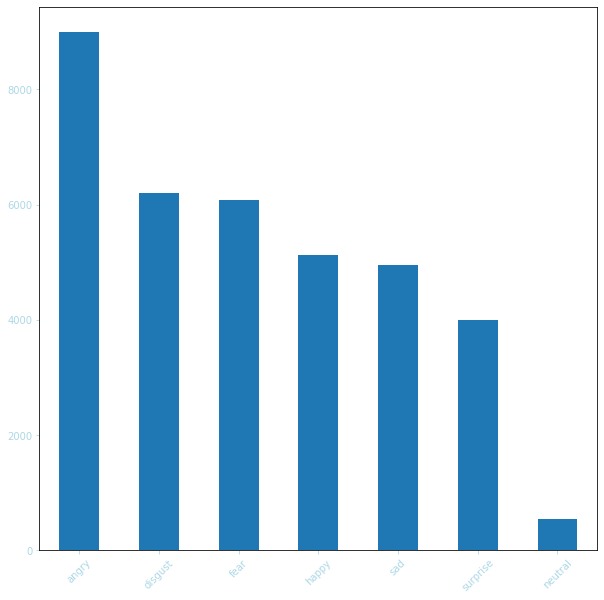

In [0]:
# Check the distribution of various emotions in the dataset
x_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
plt.figure(figsize=(10,10))
ax = raw_df["emotion"].value_counts().plot(kind='bar')
ax.set_xticklabels(x_labels);
ax.tick_params(axis='x', colors='lightblue', rotation=45)
ax.tick_params(axis='y', colors='lightblue')

## Creating Training and Test Sets

In [0]:
# X_train = raw_df['pixels'][raw_df["Usage"] == "Training"]
# y_train = raw_df['emotion'][raw_df["Usage"] == "Training"]
# X_test = raw_df['pixels'][raw_df["Usage"] == "PublicTest"]
# y_test= raw_df['emotion'][raw_df["Usage"] == "PublicTest"]
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Initialize the total number of classes

In [0]:
# Initialize the total number of classes
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral

### Initialize training and test datasets

In [0]:
# Initialize training and test datasets
X_train, y_train, X_test, y_test = [], [], [], []

In [0]:
# Transform train and test data sets

# Loop through the entire dataframe
for index, row in raw_df.iterrows():
  # transform pixels
  pixels_val = row["pixels"]
  pixels = np.array(pixels_val.split(" "), dtype='float32')

  # transform emotions
  emotion_val = row["emotion"]
  emotion = keras.utils.to_categorical(emotion_val, num_classes=num_classes)

  # Split the data based on usage
  usage = row["Usage"]

  if "Training" in usage:
    X_train.append(pixels)
    y_train.append(emotion)
  elif "PublicTest" in usage:
    X_test.append(pixels)
    y_test.append(emotion)

In [0]:
X_train

[array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32),
 array([151., 150., 147., ..., 193., 183., 184.], dtype=float32),
 array([231., 212., 156., ...,  88., 110., 152.], dtype=float32),
 array([ 24.,  32.,  36., ..., 142., 143., 142.], dtype=float32),
 array([ 4.,  0.,  0., ..., 30., 29., 30.], dtype=float32),
 array([55., 55., 55., ..., 34., 30., 57.], dtype=float32),
 array([ 20.,  17.,  19., ...,  99., 107., 118.], dtype=float32),
 array([ 77.,  78.,  79., ..., 125.,  67.,  68.], dtype=float32),
 array([85., 84., 90., ..., 58., 73., 84.], dtype=float32),
 array([255., 254., 255., ..., 254., 255., 255.], dtype=float32),
 array([ 30.,  24.,  21., ..., 172., 173., 173.], dtype=float32),
 array([39., 75., 78., ..., 84., 83., 87.], dtype=float32),
 array([219., 213., 206., ...,   0.,   0.,   0.], dtype=float32),
 array([148., 144., 130., ..., 112., 111., 111.], dtype=float32),
 array([ 4.,  2., 13., ...,  3.,  7., 12.], dtype=float32),
 array([107., 107., 109., ...,  83.,  84

In [0]:
# Current training and test data sets are in the form of lists, we need to convert them into arrays

X_train = np.array(X_train, dtype='float32')
y_train = np.array(y_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [0]:
X_train

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 74.,  81.,  87., ..., 188., 187., 187.],
       [222., 227., 203., ..., 136., 136., 134.],
       [195., 199., 205., ...,   6.,  15.,  38.]], dtype=float32)

### Normalize the inputs between [0, 1]

In [0]:
# Normalize the inputs between [0, 1]
X_train /= 255
X_test /= 255

In [0]:
X_train.shape[0]

28709

### Reshape the inputs

In [0]:
# Reshape each value from 1D(28709) to 3D(48,48,1)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [0]:
X_train.shape

(28709, 48, 48, 1)

### Batichfy the data

Turn the data into batches as our CNN model would accept data in the form of batches.

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Turn data to batches
batch_size = 256
gen = ImageDataGenerator()
train_generator = gen.flow(X_train, y_train, batch_size = batch_size)

## Construct a CNN (Convolutional Neural Network)

Here we can start with Keras-Sequential as our base model.

### Create a model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()

# 1st Convolutionla layer
model.add(Conv2D(64, (5,5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2,2)))

# 2nd Convolutionla layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

# 3rd Convolutionla layer
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Flatten())

# Fully connected Neural Network
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Fit the model

In [0]:
# Assign number of epochs for which the model has to be trained
epochs = 30 #@param{type:"slider", min:0, max:100, step:10}

In [0]:
fit = False

if fit == True:
  # Train the model on the entire data set
  model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs, verbose=1)

  #Saving the model as a single .hdf5 file
  # model.save('drive/My Drive/Expression Detection/model25.hdf5')
  save_model(model, save_method='Pickle')
else:
  # load weights
  #model.load_weights('drive/My Drive/Expression Detection/facial_expression_model_weights.h5')
  pass


## Saving the model

We can save a model using two methods.
* Using Keras in-built save method.
* Using Pickle dump method.

In [0]:
import pickle

# Save a model using either uisng Keras `save()` method or Picke `dump()` method

def save_model(model, save_method='Keras'):
  if save_method == 'Keras':
    # Method 1: Using Keras. Will be save as a single .hdf5 file
    model.save(base_path+'model30.hdf5')
  elif save_method == 'Pickle':
    # Method 2 : Usign pickle
    with open(base_path+'model30.pkl', 'wb') as file:
      pickle.dump(model, file)
  
  print("Model saved.")

In [0]:
#save_model(model, save_method='Keras')

## Load the saved model

Similar to saving a model, we can load the model in two ways:
* Using Keras `load_model()`
* Using Pickle `load()`

The loaded model can be directly used of prediction.

In [0]:
import pickle

# Load a model using Keras or Pickle

def load_model(load_method='Keras'):
  model = None
  if load_method == 'Keras':
    # Method 1: Using Keras
    model = keras.models.load_model(base_path+'model30.hdf5')
  elif load_method == 'Pickle':
    # Method 2: Using Pickle
    with open(base_path+f'model30.pkl', 'rb') as f:
      model = pickle.load(f)
  
  print("Model Loaded.")
  return model

In [0]:
loaded_model = load_model(load_method='Keras')

Model Loaded.


## Evaluate the trained model

Use the `evaluate()` method to evalute the trained model against train and test dataset

In [0]:
train_score = loaded_model.evaluate(X_train, y_train, verbose=1)
print(f"Train loss : {train_score[0]}")
print(f"Train accuracy : {train_score[1]}")
test_score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss : {test_score[0]}")
print(f"Test accuracy : {test_score[1]}")

28709/28709 [==============================] - 9s 321us/step
Train loss : 0.10656422008320872
Train accuracy : 0.9660733342170715
3589/3589 [==============================] - 0s 106us/step
Test loss : 3.0733279346190776
Test accuracy : 0.5617163777351379


### Function to analyze and plot the prediction results

In [0]:
def analyze_emotion(emotions):
  label_values = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  y_seq = np.arange(len(label_values))

  plt.bar(y_seq, emotions, align='center', alpha=0.5)
  plt.xticks(y_seq, labels=label_values)
  plt.ylabel('Percentage')
  plt.title('Emotion')
  plt.show()

### Confusion Matrix

Plotting a confusin matrix between predicted labels and truth(ground) labels

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


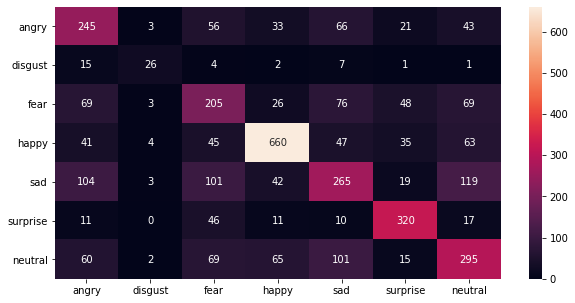

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

label_names = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
label_values = [0,1,2,3,4,5,6]

# Make a predictions predictions list
y_preds = loaded_model.predict(X_test)
y_preds_mod, y_test_mod = [], []

for pred in y_preds:
  y_preds_mod.append(np.argmax(pred))

for truth in y_test:
  y_test_mod.append(np.argmax(truth))

# Create a confusion matrix
cm = confusion_matrix(y_test_mod, y_preds_mod, labels=label_values)

# Visualize the confusion matrix using Seaborn heatmap
df_cm = pd.DataFrame(cm,
                     index=label_names,
                     columns=label_names)
plt.figure(figsize=(10,5))
sn.heatmap(df_cm, annot=True, fmt='g');

## Testing the model with custom(external) data


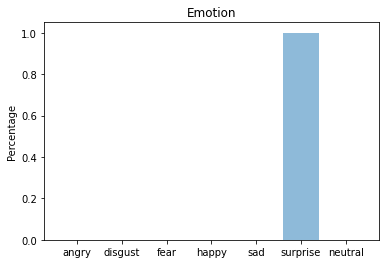

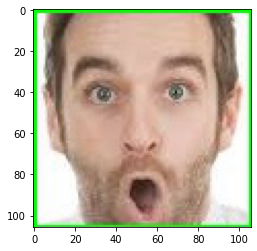

In [0]:
file = "drive/My Drive/Expression Detection/data/capture.jpg"
actual_image = image.load_img(file)
img = image.load_img(file, color_mode='grayscale', target_size=(48,48))

X_custom = image.img_to_array(img)
X_custom = np.expand_dims(X_custom, axis=0)

#normalize the cusotm input
X_custom /= 255

y_custom = loaded_model.predict(X_custom)
analyze_emotion(y_custom[0])


plt.gray()
plt.imshow(actual_image)
plt.show()


### Reduce noise in testing images using openCV2 and Haarcascade model.

Before sending our custom image to the model for prediction, we have to make sure the all the un-necessary part of the image is removed. Haarcascade model with the help of openCV2 automatically detects the face in the model and trims the remaining part. 
Doing so, will make our model less confused and predict well.

Create a function named `face_crop()` which will achieve the above behaviour.

In [0]:
def face_crop(image):
  face_data = base_path + 'haarcascade_frontalface_alt.xml'
  cascade = cv2.CascadeClassifier(face_data)
  img = cv2.imread(image)
  if (img is None):
    print("Can't open image file")
    return 0

  try:
  
    minisize = (img.shape[1], img.shape[0])
    miniframe = cv2.resize(img, minisize)

    faces = cascade.detectMultiScale(miniframe)
    if (faces is None):
      print('Failed to detect face')
      return 0

    facecnt = len(faces)
    print("Detected faces: %d" % facecnt)

    for f in faces:
      x, y, w, h = [v for v in f]
      cv2.rectangle(img, (x,y), (x+w,y+w), (0,255,0), 2)
      sub_face = img[y:y+h, x:x+w]
      cv2.imwrite(base_path+'data/capture.jpg', sub_face)

      #cv2.imwrite(image, sub_face)
      
    print("crop completed.")

  except Exception as e:
    print(e)

In [0]:
def face_crop_new(image_path):
  face_data = base_path + 'haarcascade_frontalface_alt.xml'
  cascade = cv2.CascadeClassifier(face_data)
  img = cv2.imread(image_path)

  if (img is None):
    print("Can't open image file")
    return 0

  faces = cascade.detectMultiScale(img, 1.1, 3, minSize=(100, 100))
  if (faces is None):
    print('Failed to detect face')
    return 0

  facecnt = len(faces)
  print("Detected faces: %d" % facecnt)
  i = 0
  height, width = img.shape[:2]

  for (x, y, w, h) in faces:
    r = max(w, h) / 2
    centerx = x + w / 2
    centery = y + h / 2
    nx = int(centerx - r)
    ny = int(centery - r)
    nr = int(r * 2)

    faceimg = img[ny:ny+nr, nx:nx+nr]
    lastimg = cv2.resize(faceimg, (48, 48))
    i += 1
    cv2.imwrite(base_path+"data/capture%d.jpg" % i, lastimg)


In [0]:
face_crop(base_path+'data/3.jpg')

Detected faces: 1
crop completed.


### CODE for Capturing an image on Colab

In [0]:
# Referenced from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename=base_path+'data/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
# take_photo(base_path+'data/photo.jpg')